# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.utils import shuffle

In [70]:
Data = pd.read_csv("CarPrice_Assignment.csv")
Data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [71]:
Data.shape

(205, 26)

In [72]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [73]:
Data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [74]:
Data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [75]:
Data.drop(columns='car_ID',inplace=True)
Data.drop(columns='CarName',inplace=True)
# dataset.drop(columns='car_ID', inplace=True)
# dataset.drop(columns='CarName', inplace=True)
Data.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [76]:
Data = pd.get_dummies(Data, prefix=['fueltype','aspiration', 'doornumber','carbody', 'drivewheel',
                                          'enginelocation', 'enginetype','cylindernumber', 
                                          'fuelsystem'])


In [78]:
Data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

In [92]:
y = Data["price"]

In [93]:
Data.drop(columns='price',inplace=True)

In [94]:
Data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [95]:
X_Train = Data[:104]
Y_Train = y[:104]   #50% training data
Y_Train

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
99      8949.0
100     9549.0
101    13499.0
102    14399.0
103    13499.0
Name: price, Length: 104, dtype: float64

In [96]:
X_Test = Data[104:165]
Y_Test = y[104:165]     #30% testing data
Y_Test

104    17199.0
105    19699.0
106    18399.0
107    11900.0
108    13200.0
        ...   
160     7738.0
161     8358.0
162     9258.0
163     8058.0
164     8238.0
Name: price, Length: 61, dtype: float64

In [97]:
X_Val = Data[165:]
Y_Val = y[165:]
Y_Val

165     9298.0
166     9538.0
167     8449.0
168     9639.0
169     9989.0
170    11199.0
171    11549.0
172    17669.0
173     8948.0
174    10698.0
175     9988.0
176    10898.0
177    11248.0
178    16558.0
179    15998.0
180    15690.0
181    15750.0
182     7775.0
183     7975.0
184     7995.0
185     8195.0
186     8495.0
187     9495.0
188     9995.0
189    11595.0
190     9980.0
191    13295.0
192    13845.0
193    12290.0
194    12940.0
195    13415.0
196    15985.0
197    16515.0
198    18420.0
199    18950.0
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, dtype: float64

In [98]:
mean=X_Train.iloc[:,:14].mean(axis=0)
X_Train.iloc[:,:14]=X_Train.iloc[:,:14]-mean
std=X_Train.iloc[:,:14].std(axis=0)
X_Train.iloc[: , 0:14] = X_Train.iloc[: , 0:14]/std
X_Train

D:\ja\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.911077,-1.519175,-0.241081,-0.677919,-1.866160,0.077024,0.027917,0.874083,-2.684576,-0.198617,...,0,0,0,0,0,0,0,1,0,0
1,1.911077,-1.519175,-0.241081,-0.677919,-1.866160,0.077024,0.027917,0.874083,-2.684576,-0.198617,...,0,0,0,0,0,0,0,1,0,0
2,0.062221,-0.572621,-0.065953,-0.109996,-0.326516,0.532163,0.453736,-2.340538,0.497258,-0.198617,...,0,0,0,0,0,0,0,1,0,0
3,0.986649,0.277672,0.328084,0.173965,0.486073,-0.272193,-0.378548,-0.265277,0.215324,0.098980,...,0,0,0,0,0,0,0,1,0,0
4,0.986649,0.213499,0.328084,0.255097,0.486073,0.533819,0.144049,-0.265277,0.215324,-0.496214,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,-0.862207,-0.139453,0.094580,-0.231694,0.657145,-0.293708,-0.165638,0.304403,0.497258,-0.347416,...,0,0,0,1,0,0,0,0,0,0
100,-0.862207,-0.139453,0.094580,-0.231694,0.657145,-0.330120,-0.165638,0.304403,0.497258,-0.347416,...,0,0,0,1,0,0,0,0,0,0
101,-0.862207,0.373932,0.700230,0.295663,0.828216,0.982338,1.015044,0.711317,-0.308269,-0.198617,...,0,0,0,0,0,0,0,1,0,0
102,-0.862207,0.373932,0.911842,0.295663,1.255895,1.315004,1.015044,0.711317,-0.308269,-0.198617,...,0,0,0,0,0,0,0,1,0,0


In [99]:
val_mean = X_Val.iloc[:, 0:14].mean(axis=0)
val_std = X_Val.iloc[:, 0:14].std(axis=0)
X_Val.iloc[:, 0:14] -= val_mean
X_Val.iloc[:, 0:14] /= val_std

D:\ja\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [100]:
test_mean = X_Test.iloc[:, 0:14].mean(axis=0)
test_std =  X_Test.iloc[:, 0:14].std(axis=0)
X_Test.iloc[:, 0:14] -= test_mean
X_Test.iloc[:, 0:14] /= test_std
X_Test

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
104,1.801430,-1.120050,-0.296817,1.079370,-1.583894,1.085775,1.924412,0.046724,0.581421,-0.320801,...,0,0,0,0,0,0,0,1,0,0
105,1.801430,-1.120050,-0.296817,1.079370,-1.583894,1.235636,1.924412,0.046724,0.581421,-0.614664,...,0,0,0,0,0,0,0,1,0,0
106,0.084442,0.141643,0.388079,1.079370,-1.583894,1.235636,1.924412,0.046724,0.581421,-0.320801,...,0,0,0,0,0,0,0,1,0,0
107,-0.774052,1.531102,1.108097,1.335563,0.928449,0.973378,-0.069667,0.152286,0.373405,-0.467732,...,0,0,0,0,0,0,0,1,0,0
108,-0.774052,1.531102,1.108097,1.335563,0.928449,1.363459,0.976407,0.996782,1.231470,2.617832,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,-0.774052,-0.417335,-0.683168,-0.713980,-0.399504,-1.067385,-0.788843,-0.797772,-0.042626,-0.320801,...,0,0,0,1,0,0,0,0,0,0
161,-0.774052,-0.417335,-0.683168,-0.713980,-0.471285,-1.005677,-0.788843,-0.797772,-0.042626,-0.320801,...,0,0,0,1,0,0,0,0,0,0
162,-0.774052,-0.417335,-0.683168,-0.713980,-0.471285,-0.966008,-0.788843,-0.797772,-0.042626,-0.320801,...,0,0,0,1,0,0,0,0,0,0
163,0.084442,-0.608985,-0.472431,-0.918934,-0.543066,-0.902096,-0.788843,-0.797772,-0.042626,-0.320801,...,0,0,0,1,0,0,0,0,0,0


In [101]:
X_Train.shape

(104, 52)

In [102]:
X_Test.shape

(61, 52)

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [104]:
network = models.Sequential()
network.add(layers.Dense(10,activation = 'relu',input_shape=(X_Train.shape[1],)))
network.add(layers.Dense(8,activation = 'relu'))
network.add(layers.Dense(6,activation = 'relu'))

In [105]:
network.compile(optimizer = 'rmsprop', loss = "mse" , metrics = ['mae'])                                                                

In [106]:
network.fit(X_Train , Y_Train , epochs = 100, validation_data = (X_Val , Y_Val))

ValueError: A target array with shape (104, 1) was passed for an output of shape (None, 6) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

In [107]:
network.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(X_Train.shape[1],)))
network.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
network.add(layers.Dense(1))

In [108]:
network.compile(optimizer='adam', loss='mse', metrics=['mae'])
network.fit(X_Train,Y_Train, batch_size=16, epochs=200, validation_data=(X_Val, Y_Val))

Train on 104 samples, validate on 40 samples
Epoch 1/200
104/104 [==============================] - 1s 14ms/sample - loss: 278451057.2308 - mean_absolute_error: 13791.3848 - val_loss: 188653993.6000 - val_mean_absolute_error: 13068.2324
Epoch 2/200
104/104 [==============================] - 0s 510us/sample - loss: 278450070.1538 - mean_absolute_error: 13791.3496 - val_loss: 188652966.4000 - val_mean_absolute_error: 13068.1943
Epoch 3/200
104/104 [==============================] - 0s 596us/sample - loss: 278448758.1538 - mean_absolute_error: 13791.3105 - val_loss: 188651622.4000 - val_mean_absolute_error: 13068.1465
Epoch 4/200
104/104 [==============================] - 0s 635us/sample - loss: 278446899.6923 - mean_absolute_error: 13791.2559 - val_loss: 188649699.2000 - val_mean_absolute_error: 13068.0791
Epoch 5/200
104/104 [==============================] - 0s 490us/sample - loss: 278443462.1538 - mean_absolute_error: 13791.1660 - val_loss: 188645740.8000 - val_mean_absolute_error: 13

Epoch 43/200
104/104 [==============================] - 0s 394us/sample - loss: 11140070.6154 - mean_absolute_error: 2307.9905 - val_loss: 16889974.4000 - val_mean_absolute_error: 3713.9934
Epoch 44/200
104/104 [==============================] - 0s 346us/sample - loss: 10796002.6923 - mean_absolute_error: 2267.8154 - val_loss: 17410187.4000 - val_mean_absolute_error: 3762.7390
Epoch 45/200
104/104 [==============================] - 0s 337us/sample - loss: 10564843.9231 - mean_absolute_error: 2246.4470 - val_loss: 17519359.2000 - val_mean_absolute_error: 3767.3164
Epoch 46/200
104/104 [==============================] - 0s 413us/sample - loss: 10278293.8462 - mean_absolute_error: 2211.5547 - val_loss: 17814953.6000 - val_mean_absolute_error: 3787.5632
Epoch 47/200
104/104 [==============================] - 0s 462us/sample - loss: 10062738.9423 - mean_absolute_error: 2178.2957 - val_loss: 17862589.0000 - val_mean_absolute_error: 3784.4617
Epoch 48/200
104/104 [============================

Epoch 86/200
104/104 [==============================] - 0s 327us/sample - loss: 6439150.1154 - mean_absolute_error: 1654.3523 - val_loss: 18837745.2000 - val_mean_absolute_error: 3605.4692
Epoch 87/200
104/104 [==============================] - 0s 356us/sample - loss: 6398961.9327 - mean_absolute_error: 1649.2452 - val_loss: 18778353.6000 - val_mean_absolute_error: 3597.5059
Epoch 88/200
104/104 [==============================] - 0s 308us/sample - loss: 6311366.0000 - mean_absolute_error: 1628.7421 - val_loss: 19387126.2000 - val_mean_absolute_error: 3642.9250
Epoch 89/200
104/104 [==============================] - 0s 385us/sample - loss: 6262331.6058 - mean_absolute_error: 1626.1191 - val_loss: 19460113.6000 - val_mean_absolute_error: 3646.7524
Epoch 90/200
104/104 [==============================] - 0s 404us/sample - loss: 6217617.2500 - mean_absolute_error: 1618.2841 - val_loss: 19628880.0000 - val_mean_absolute_error: 3657.8711
Epoch 91/200
104/104 [==============================] -

Epoch 129/200
104/104 [==============================] - 0s 413us/sample - loss: 5024430.4808 - mean_absolute_error: 1446.2448 - val_loss: 19912801.0000 - val_mean_absolute_error: 3654.9277
Epoch 130/200
104/104 [==============================] - 0s 1ms/sample - loss: 4979750.1346 - mean_absolute_error: 1432.3915 - val_loss: 21430891.2000 - val_mean_absolute_error: 3778.2422
Epoch 131/200
104/104 [==============================] - 0s 885us/sample - loss: 4957956.8077 - mean_absolute_error: 1433.7487 - val_loss: 21385334.4000 - val_mean_absolute_error: 3776.0151
Epoch 132/200
104/104 [==============================] - 0s 769us/sample - loss: 5021867.6346 - mean_absolute_error: 1446.8693 - val_loss: 22146049.6000 - val_mean_absolute_error: 3837.9407
Epoch 133/200
104/104 [==============================] - 0s 663us/sample - loss: 4890698.3654 - mean_absolute_error: 1422.6946 - val_loss: 20528014.8000 - val_mean_absolute_error: 3712.6157
Epoch 134/200
104/104 [=============================

Epoch 172/200
104/104 [==============================] - 0s 327us/sample - loss: 4099838.7115 - mean_absolute_error: 1329.0007 - val_loss: 22083536.2000 - val_mean_absolute_error: 3843.9312
Epoch 173/200
104/104 [==============================] - 0s 356us/sample - loss: 4067322.4423 - mean_absolute_error: 1320.7662 - val_loss: 22304411.6000 - val_mean_absolute_error: 3855.5806
Epoch 174/200
104/104 [==============================] - 0s 317us/sample - loss: 4056507.2308 - mean_absolute_error: 1321.4232 - val_loss: 21715547.6000 - val_mean_absolute_error: 3808.5339
Epoch 175/200
104/104 [==============================] - 0s 356us/sample - loss: 4042938.8077 - mean_absolute_error: 1316.7279 - val_loss: 22713192.0000 - val_mean_absolute_error: 3882.3892
Epoch 176/200
104/104 [==============================] - 0s 394us/sample - loss: 4088013.4712 - mean_absolute_error: 1330.0913 - val_loss: 23525290.0000 - val_mean_absolute_error: 3942.5630
Epoch 177/200
104/104 [===========================

No handles with labels found to put in legend.


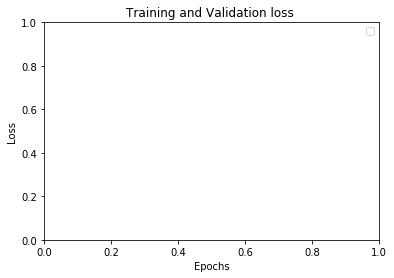

In [116]:
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [118]:
a=network.predict(X_Test)
print(a[0])
np.array(Y_Test)[0]

[22278.273]


17199.0